In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/SMA Practice/Dataset/sentiment.csv')
df.head()

,text,label
0,I love this product!,positive
1,This movie was terrible.,negative
2,I can't wait to go on vacation!,positive
3,Traffic today was a nightmare.,negative
4,The food at this restaurant was amazing!,positive


In [6]:
from textblob import TextBlob
import seaborn as sns

In [7]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df

,text,label,polarity
0,I love this product!,positive,0.625
1,This movie was terrible.,negative,-1.000
2,I can't wait to go on vacation!,positive,0.000
3,Traffic today was a nightmare.,negative,0.000
4,The food at this restaurant was amazing!,positive,0.750
5,I'm so tired of this rain.,negative,-0.400
6,Great workout at the gym today!,positive,1.000
7,"Ugh, another meeting.",negative,0.000
8,"Spent the day at the beach with my family, it ...",positive,0.450
9,I hate when my flight gets delayed.,negative,-0.800


In [9]:
df['Sentiment_Label'] = pd.cut(df['polarity'], bins=3, labels=['Negative', 'Neutral', 'Positive'])
df

,text,label,polarity,Sentiment_Label
0,I love this product!,positive,0.625,Positive
1,This movie was terrible.,negative,-1.000,Negative
2,I can't wait to go on vacation!,positive,0.000,Neutral
3,Traffic today was a nightmare.,negative,0.000,Neutral
4,The food at this restaurant was amazing!,positive,0.750,Positive
5,I'm so tired of this rain.,negative,-0.400,Negative
6,Great workout at the gym today!,positive,1.000,Positive
7,"Ugh, another meeting.",negative,0.000,Neutral
8,"Spent the day at the beach with my family, it ...",positive,0.450,Positive
9,I hate when my flight gets delayed.,negative,-0.800,Negative


In [13]:
pos_tweets = df[df['Sentiment_Label'] == 'Positive']
neg_tweets = df[df['Sentiment_Label'] == 'Negative']

pos_tweets

,text,label,polarity,Sentiment_Label
0,I love this product!,positive,0.625,Positive
4,The food at this restaurant was amazing!,positive,0.750,Positive
6,Great workout at the gym today!,positive,1.000,Positive
8,"Spent the day at the beach with my family, it ...",positive,0.450,Positive


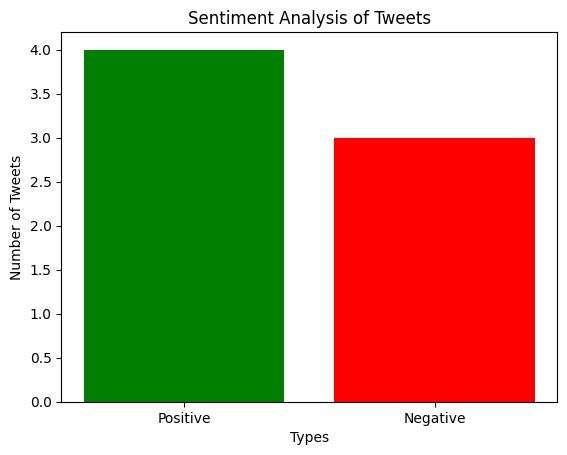

In [16]:
pos_count = len(pos_tweets)
neg_count = len(neg_tweets)

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(['Positive', 'Negative'], [pos_count, neg_count], color=['green', 'red'])
ax.set_xlabel('Types')
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Analysis of Tweets')

plt.show()

<ipython-input-12-4179e023eb83>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pos_tweets["polarity"], shade=True, label="Positive")
<ipython-input-12-4179e023eb83>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(neg_tweets["polarity"], shade=True, label="Negative")


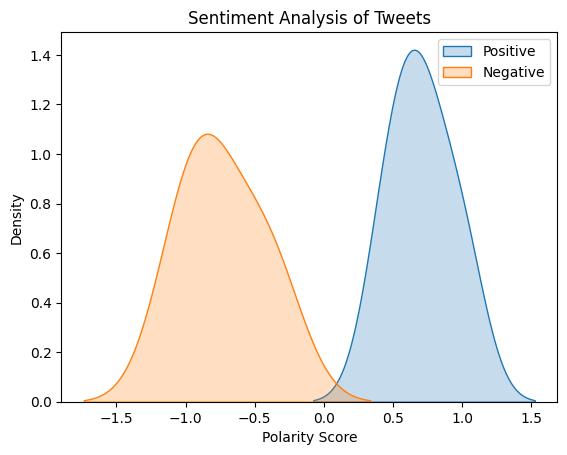

In [12]:
sns.kdeplot(pos_tweets["polarity"], shade=True, label="Positive")
sns.kdeplot(neg_tweets["polarity"], shade=True, label="Negative")
plt.xlabel("Polarity Score")
plt.ylabel("Density")
plt.title("Sentiment Analysis of Tweets")
plt.legend()
plt.show()

In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a list of text
text_list = ["I love this product!",
             "This movie was terrible.",
             "I can't wait to go on vacation!",
             "Traffic today was a nightmare.",
             "The food at this restaurant was amazing!",
             "I'm so tired of this rain.",
             "Great workout at the gym today!",
             "Ugh, another meeting.",
             "Spent the day at the beach with my family, it was perfect!",
             "I hate when my flight gets delayed."]

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Create an empty list to store the sentiment scores for each text
sentiment_scores = []

# Loop through each text in the list and get the sentiment score
for text in text_list:
    sentiment_score = sid.polarity_scores(text)
    sentiment_scores.append(sentiment_score)

# Print the sentiment score for each text
for i in range(len(text_list)):
    print(f"Text: {text_list[i]}")
    print(f"Sentiment score: {sentiment_scores[i]}")

Text: I love this product!
Sentiment score: {'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}
Text: This movie was terrible.
Sentiment score: {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}
Text: I can't wait to go on vacation!
Sentiment score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text: Traffic today was a nightmare.
Sentiment score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text: The food at this restaurant was amazing!
Sentiment score: {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.6239}
Text: I'm so tired of this rain.
Sentiment score: {'neg': 0.39, 'neu': 0.61, 'pos': 0.0, 'compound': -0.4927}
Text: Great workout at the gym today!
Sentiment score: {'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.6588}
Text: Ugh, another meeting.
Sentiment score: {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4215}
Text: Spent the day at the beach with my family, it was perfect!
Sentiment score: {'neg': 0.0, 'neu': 0.734, '

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
